In [13]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [14]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [15]:
def process_values(state: AgentState) -> AgentState:
    """ This function handles multiple different inputs """

    state['result'] = f"Hi there {state['name']}! Your sum: {sum(state['values'])}"
    return state

In [16]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)

graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

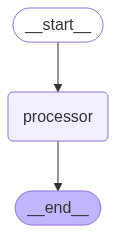

In [17]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
answers = app.invoke({"values": [1, 2, 3], "name": "Alice"})
print(answers)
print(answers['result'])

{'values': [1, 2, 3], 'name': 'Alice', 'result': 'Hi there Alice! Your sum: 6'}
Hi there Alice! Your sum: 6


# Exercises

In [20]:
class AgentState2(TypedDict):
    values: List[int]
    name: str
    result: str
    operation: str

In [21]:
from math import prod

def calculate_value(state: AgentState2) -> AgentState2:
    """ This function calculates a value based on the input state """
    if state['operation'] == '+':
        state['result'] = f"Hello {state['name']}! Your calculated value: {sum(state['values'])}"
    elif state['operation'] == '*':
        state['result'] = f"Hello {state['name']}! Your calculated value: {prod(state['values'])}"
    return state

In [22]:
graph2 = StateGraph(AgentState2)

graph2.add_node("calculator", calculate_value)

graph2.set_entry_point("calculator")
graph2.set_finish_point("calculator")

app2 = graph2.compile()

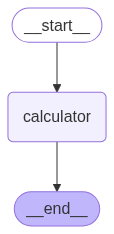

In [23]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [26]:
answers2 = app2.invoke({"values": [1, 2, 3, 4], "name": "Bob", "operation": "+"})
print(answers2)
print(answers2['result'])

answers2 = app2.invoke({"values": [1, 2, 3, 4], "name": "Bob", "operation": "*"})
print(answers2)
print(answers2['result'])

{'values': [1, 2, 3, 4], 'name': 'Bob', 'result': 'Hello Bob! Your calculated value: 10', 'operation': '+'}
Hello Bob! Your calculated value: 10
{'values': [1, 2, 3, 4], 'name': 'Bob', 'result': 'Hello Bob! Your calculated value: 24', 'operation': '*'}
Hello Bob! Your calculated value: 24
